In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns

In [9]:
# Load the passenger data
passengers = pd.read_csv("passengers.csv")

In [10]:
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# Update sex column to numerical
passengers['Sex'] = np.where(passengers['Sex'] == 'female', 1, 0)

In [12]:
# Fill the nan values in the age column
passengers['Age'] = passengers['Age'].fillna(passengers['Age'].mean())

In [13]:
# Create a first class column
passengers['FirstClass'] = np.where(passengers['Pclass'] == 1, 1, 0)
# Create a second class column
passengers['SecondClass'] = np.where(passengers['Pclass'] == 1, 1, 0)

In [16]:
# Select the desired features
# Now that we have cleaned our data, let’s select the columns we want to build our model on. 
# Select columns Sex, Age, FirstClass, and SecondClass and store them in a variable named features. 
# Select column Survived and store it a variable named survival.
features = passengers[['Sex','Age','FirstClass','SecondClass']]
survival = passengers[['Survived']]

In [17]:
# Perform train, test, split
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    survival, 
                                                    test_size=0.2, 
                                                    random_state=200)

In [20]:
# Scale the feature data so it has mean = 0 and standard deviation = 1
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(features)
print(scaled)


[[-0.73769513 -0.5924806  -0.56568542 -0.56568542]
 [ 1.35557354  0.63878901  1.76776695  1.76776695]
 [ 1.35557354 -0.2846632  -0.56568542 -0.56568542]
 ...
 [ 1.35557354  0.         -0.56568542 -0.56568542]
 [-0.73769513 -0.2846632   1.76776695  1.76776695]
 [-0.73769513  0.17706291 -0.56568542 -0.56568542]]


In [21]:
# Create and train the model
model = LogisticRegression(max_iter=6000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

C:\Users\rmart\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [22]:
# Score the model on the train data
score = model.score(x_train, y_train)
print(score)

# Score the model on the test data
score = model.score(x_test, y_test)
print(score)


0.7865168539325843
0.7821229050279329


In [30]:
print("Accuracy Score is:", accuracy_score(y_test, predictions))

print("Recall Score is:", recall_score(y_test, predictions))

print("Precision Score is:", precision_score(y_test, predictions))

print("f1 Score is:", f1_score(y_test, predictions))

Accuracy Score is: 0.7821229050279329
Recall Score is: 0.7066666666666667
Precision Score is: 0.7571428571428571
f1 Score is: 0.7310344827586207


In [32]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[87 17]
 [22 53]]


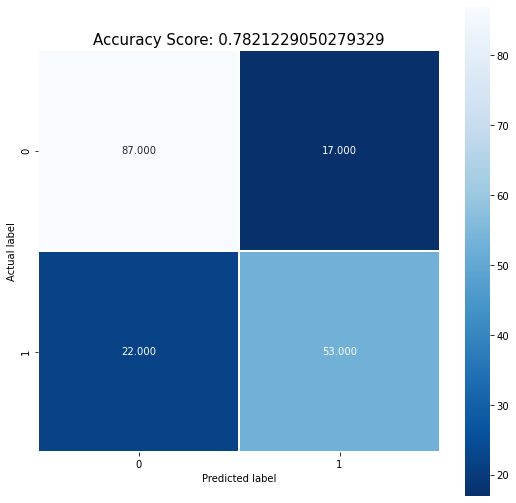

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [36]:
# Analyze the coefficients
coefficients = model.coef_
coefficients = coefficients.tolist()[0]

In [38]:
coefficients

[2.535538759161423,
 -0.030611119313798882,
 0.9698605844844608,
 0.9698605844844608]

In [42]:
list(features.columns)

['Sex', 'Age', 'FirstClass', 'SecondClass']

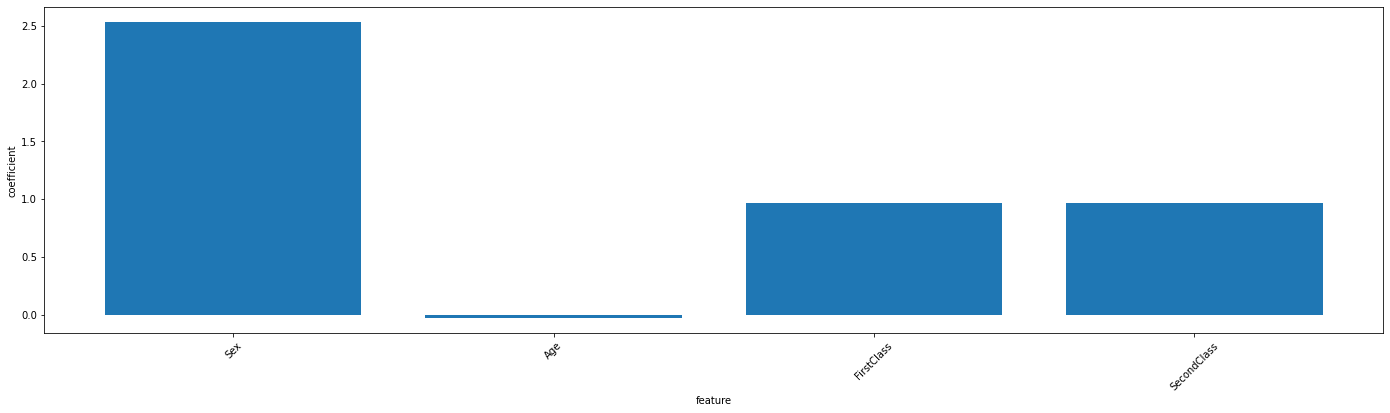

In [48]:
plt.figure(figsize=(24,6))
ax=plt.subplot()
plt.bar(range(len(features.columns)),coefficients)
plt.xticks(list(range(0,4)), rotation=45)
ax.set_xticklabels(list(features.columns))
plt.xlabel('feature')
plt.ylabel('coefficient')
 
plt.show()

In [49]:
# Sample passenger features
Jack = np.array([0.0,20.0,0.0,0.0])
Rose = np.array([1.0,17.0,1.0,0.0])
You = np.array([0.0,31.0,0.0,0.0])

In [54]:
# Combine passenger arrays
sample_passengers = np.array([Jack, Rose, You])

In [55]:
sample_passengers

array([[ 0., 20.,  0.,  0.],
       [ 1., 17.,  1.,  0.],
       [ 0., 31.,  0.,  0.]])

In [56]:
# Scale the sample passenger features
# define standard scaler
scaler = StandardScaler()
# transform data
sample_passengers = scaler.fit_transform(sample_passengers)

In [57]:
# Make survival predictions!
sample_passengers_predictions = model.predict(sample_passengers)

In [58]:
model.predict_proba(sample_passengers)

array([[0.97249155, 0.02750845],
       [0.02011508, 0.97988492],
       [0.97394934, 0.02605066]])